In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
from algorithms import *
from eda import *

# Data Preprocessing
1. Load and clean the data.
2. Normalize the features if necessary. Apply appropriate transformations (i.e. OHE)

In [28]:
# load data
housing_data = pd.read_csv('./data/HousingData.csv')
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


## **Defining column names since they are abbreviated in the .csv**:

- `CRIM`- per capita crime rate by town
- `ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.
- `INDUS` - proportion of non-retail business acres per town.
- `CHAS` - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- `NOX` - nitric oxides concentration (parts per 10 million)
- `RM` - average number of rooms per dwelling
- `AGE` - proportion of owner-occupied units built prior to 1940
- `DIS` - weighted distances to five Boston employment centres
- `RAD` - index of accessibility to radial highways
- `TAX` - full-value property-tax rate per `$10,000`
- `PTRATIO` - pupil-teacher ratio by town
- `B` - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- `LSTAT` - % lower status of the population
- `MEDV` - Median value of owner-occupied homes in $1000's

In [3]:
# inspect the data
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## Inspection Observations
- **Data Missingness**: `CRIM`, `ZN`, `INDUS`, `CHAS`, `AGE`, `LSTAT`
    - Reasoning: There are 506 rows or data instances in this dataset and these columns each have 486 data points, indicating that 20 instances have missing data for these variables. Deeper analysis can determine the mechanism of this missingness `MCAR`, `MAR`, `MNAR` and which method would be best to address the missingness (complete case analysis, multiple imputation chained equations, etc)

- **Data Types**:
    - integers: `RAD`, `TAX`
    - real numbers/floats: `CRIM`, `ZN`, `INDUS`, `NOX`, `AGE`, `DIS`, `PTRATIO`, `B`, `LSTAT`, `MEDV`
    - binary categorical: `CHAS`
    - Inquiry: Why is age a real number instead of an integer?

In [4]:
# gather summary statistics
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Summary Statistics Observations:

- **High Skewed Distributions**: `CRIM`, `ZN`, `AGE`, `B`
    - Reasoning: For columns `CRIM` and `ZN` there is a wider range between 75% and max compared to the other quartiles indicating a heavy right tail. For columns `AGE` and `B` there is a wider range between min and 25% compared to the other quartiles indicating a heavy left tail. There is also disimmilarity amongst the central tendencies mean and mediam for `CRIM`, `ZN` and `B` indicating asymmetry. For `CRIM` and `ZN` the mean falls between 3rd quartile and max values and for `B` the mean falls betweewn min and first quartile values. A skew test can confirm if this is true and statistically significant.

- **Zero Abundance**: `ZN`
    - Reasoning: Majority of the data instances equal to 0.

- **Standard Deviation**: Because standard deviation is sensitive to the scale and range of the data, `correlation of variation` may be better to compare dispersion across all the variables since it is a unitless metric.

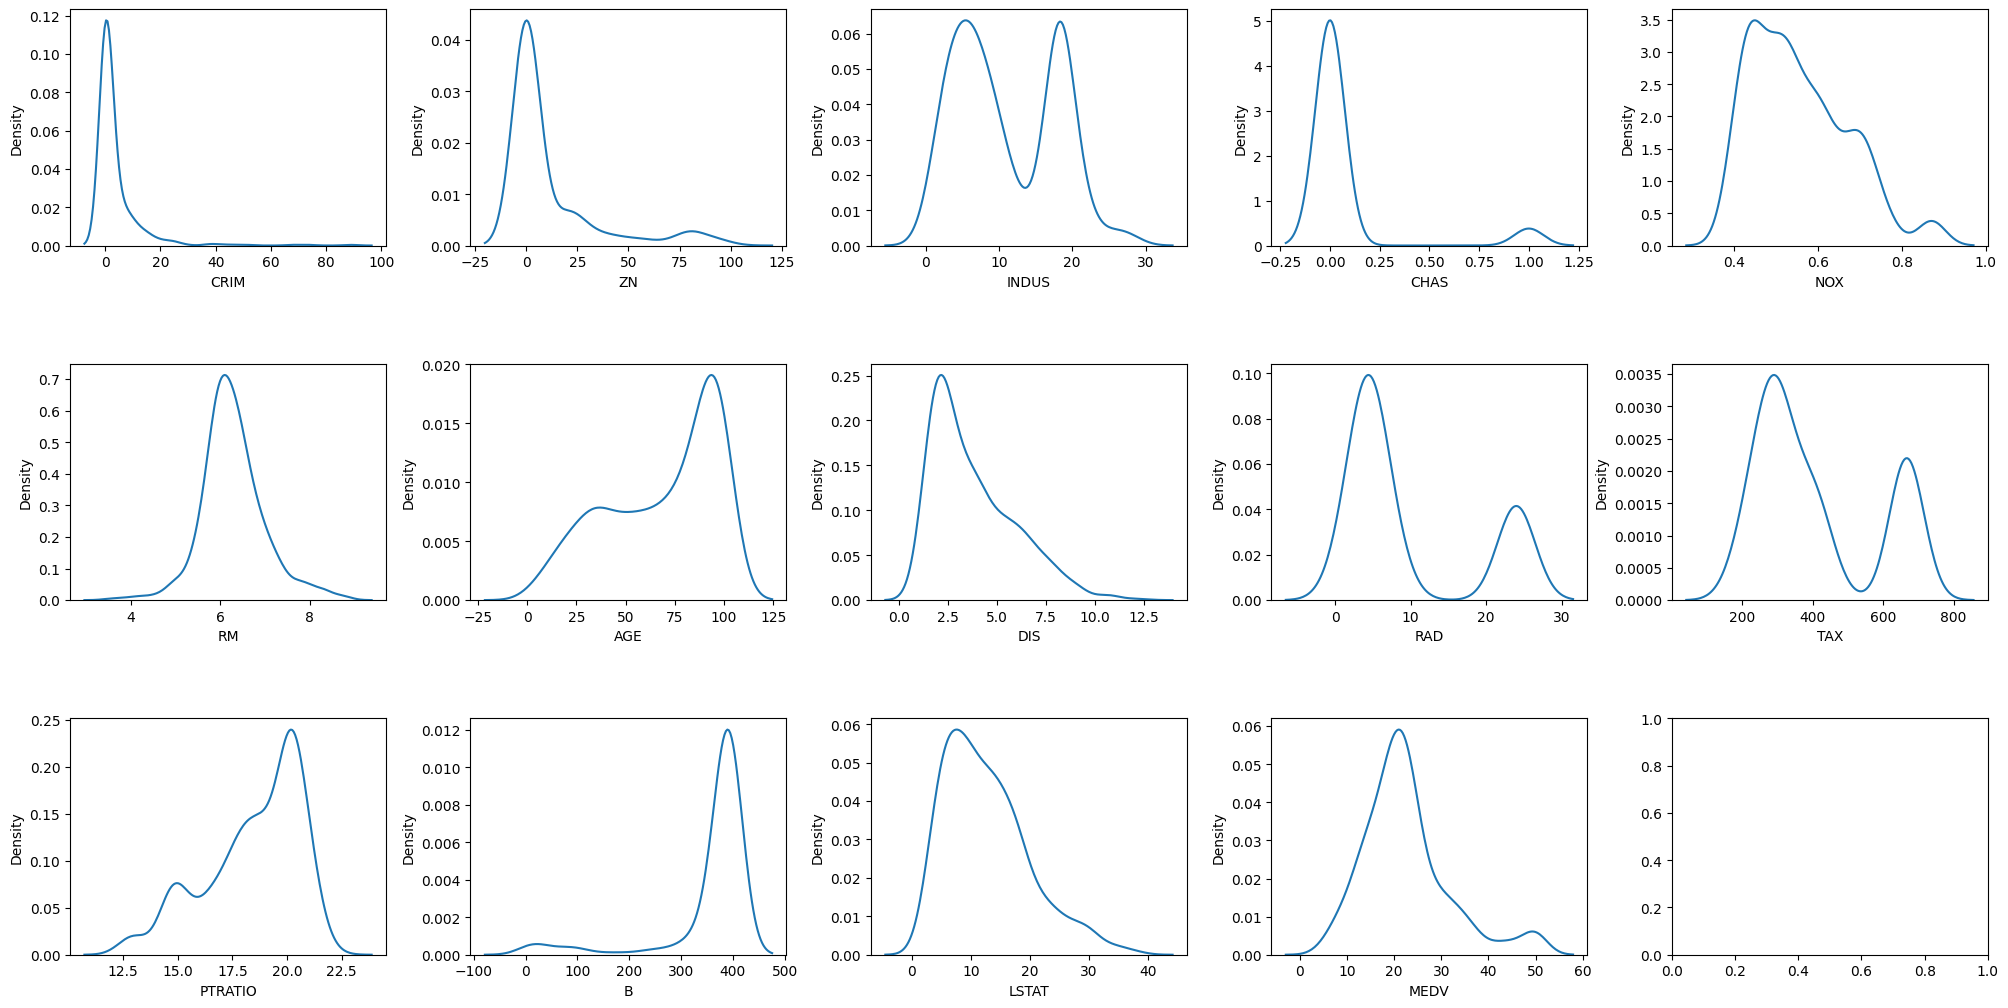

In [5]:
# visualize distributions to assess skew, kurtosis and overall distribution shape
sub_kde_plots(housing_data, 3, 5)

In [6]:
# analyze distribution shape to determine which variables are non-normal
dist_shape(housing_data).T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
skewness,5.212843,2.256613,0.303722,3.382293,0.729308,0.403612,-0.58247,1.011781,1.004815,0.669956,-0.802325,-2.890374,0.908892,1.108098
kurtosis,36.568348,4.132614,-1.217991,9.478898,-0.064667,1.891500,-0.98214,0.487941,-0.867232,-1.142408,-0.285091,7.226818,0.518683,1.495197


## EDA Visualization Observations:

- **Multi-modal**: `INDUS`, `RAD`, `TAX`
- **Highly Assymetric**: `CRIM`, `ZN`, `CHAS`, `B`
- **Moderately Assymetric**: `NOX`, `AGE`, `DIS`, `RAD`, `TAX`, `PTRATIO`, `LSTAT`, `MEDV` (target variable)
- **Leptokurtic**: `CRIM`, `ZN`, `CHAS`, `B` (threshold of 3)
- **Platykurtic**: None

All of variables violate at least one of the conditions of normality (mesokurtic, unimodal and symmetric) so we will need to normalize all of them.

# Data Cleaning

The order in which we handles issues in our data matters. While we know that normalization is a necessary step, because our data can have other issues it is best to handle those cases first so that standardization does not distort the data further. We also should look for zero abundance between each covariate and the target variable before looking for collinearity amongst the remaining features since that can distort the VIF calculation.

## **Data Missingness**:
- Motivation: Missing data can affect the accuracy and reliability of the regression model
- Protocol: Determine the type of missingness (MCAR, MNAR, MAR) and apply the optimal strategy with consideration of how different techniques affect the results
- Application: Complete case analysis (dropped any rows with NaN values), due to the scope of this assignment, exploring the mechanism of missingness and applying a more robust method like Multiple Imputation Chained Equations would be optimal but ibut for now CC Analysis is quickest and easiest. 

In [7]:
# handle data missingness through complete case analysis (may explore MICE for better data retention)
housing_data_cc = housing_data.dropna()

## **Zero Abundance**:
- Motivation: Zero value complicates data transformation for assymetric and/or non-normal data, especially for log or square root transformations
- Protocol: Remove them
- Application: Drop `ZN` variable because it is majority `0`

In [8]:
# remove zero abundance variables
housing_data_cc_no_ZN = housing_data_cc.drop(columns=['ZN'])

## **Linearity**:
- Motivation: Linear regression assumes that there is a linear relationship between X and y and when there is not heteroscedasticity in the residuals is more likely, violating another assumption of linear regression. This is because a shape will appear within the residuals, meaning they are not randomly dssitburted around the line y=0.
- Protocol: Because this is multiple linear regression, plotting each covariate against the target won't immediately show if there is linearity due to interactions but can provide us more information on our data and which features are key to explaining the variance of the target variable.
- Application: Plot every covariate against the target variable to look for 1:1 linear relationships

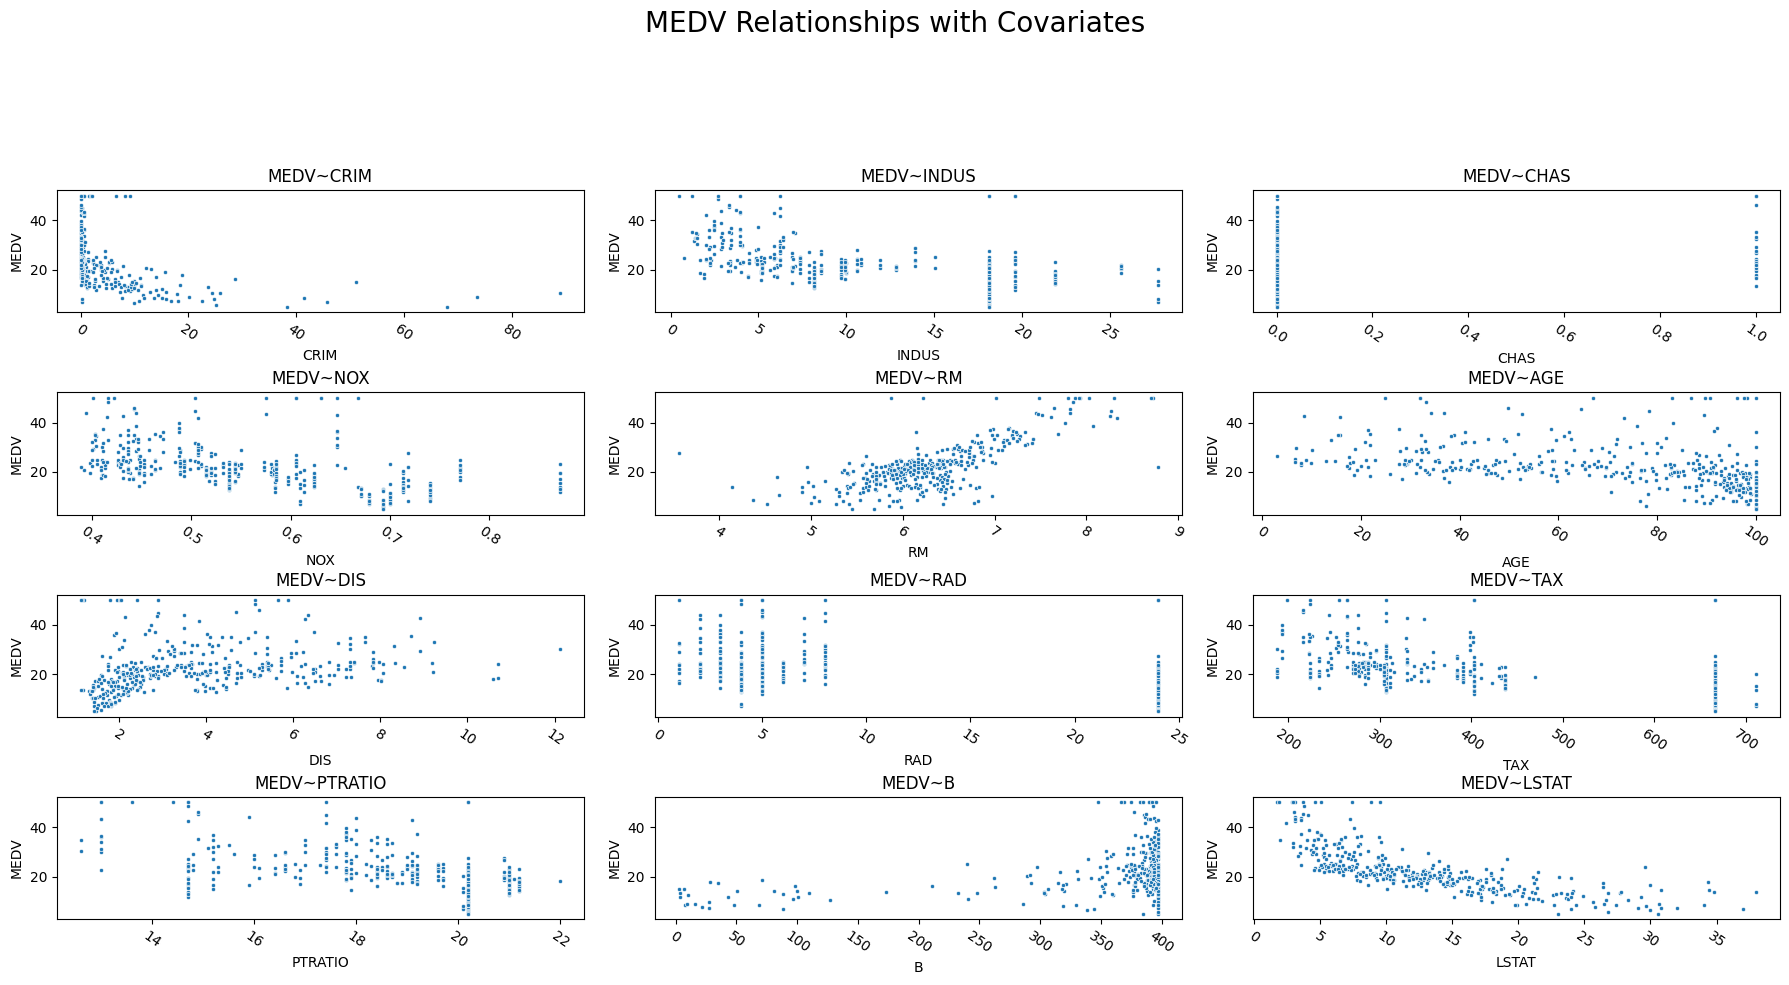

In [9]:
# separate x and y variables
features = list(housing_data_cc_no_ZN.columns)[:-1]
target = 'MEDV'

linearity_plot(housing_data_cc_no_ZN, target, features, 4, 3)

In [10]:
housing_data_cc_no_ZN.corr()[[target]].T

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
MEDV,-0.39723,-0.510829,0.173701,-0.459054,0.723951,-0.40747,0.279547,-0.416638,-0.508864,-0.543809,0.347256,-0.74345,1.0


## Linearity Analysis
Based on the scatter plots, the only covariates with a linear relationship to the target variable `MEDV` is `RM` and `LSTAT`. These scatterplots show the discrete mechanism of variables `CHAS`(binary) and `RAD`. Looking at the correlation coefficients of each covariate with respect to the target, it is clear that those are also the only variables with a moderate/strong correlations.

## **Outliers**:
- Motivation: Outliers negatively impact regression modelling by increasing instability in coefficient parameter estimation and widening confidencen intervals. Outliers also distort a models ability to explain the variance of Y using X.
- Protocol: Detect potential outliers, identify their impact on results, determine likelihood of outlier classification and handle outliers with removal or data transformation.
- Application: Applied ORQ Transformation to guarantee outlier removal from variables since based on the boxplots below `CRIM`, `CHAS`, `PM`, `DIS`, `PTRATIO`, `B`, `LSTAT`, and our target variable `MEDV` all contain outliers (there are 30+ detection methods that are more robust but for the simplicity of this assignment Tukey's Boxplots is sufficient). Since ORQ Transformation also guarantees normality, it has been applied to all the covariates.
- **Results**: All outliers weren't removed but majority were.

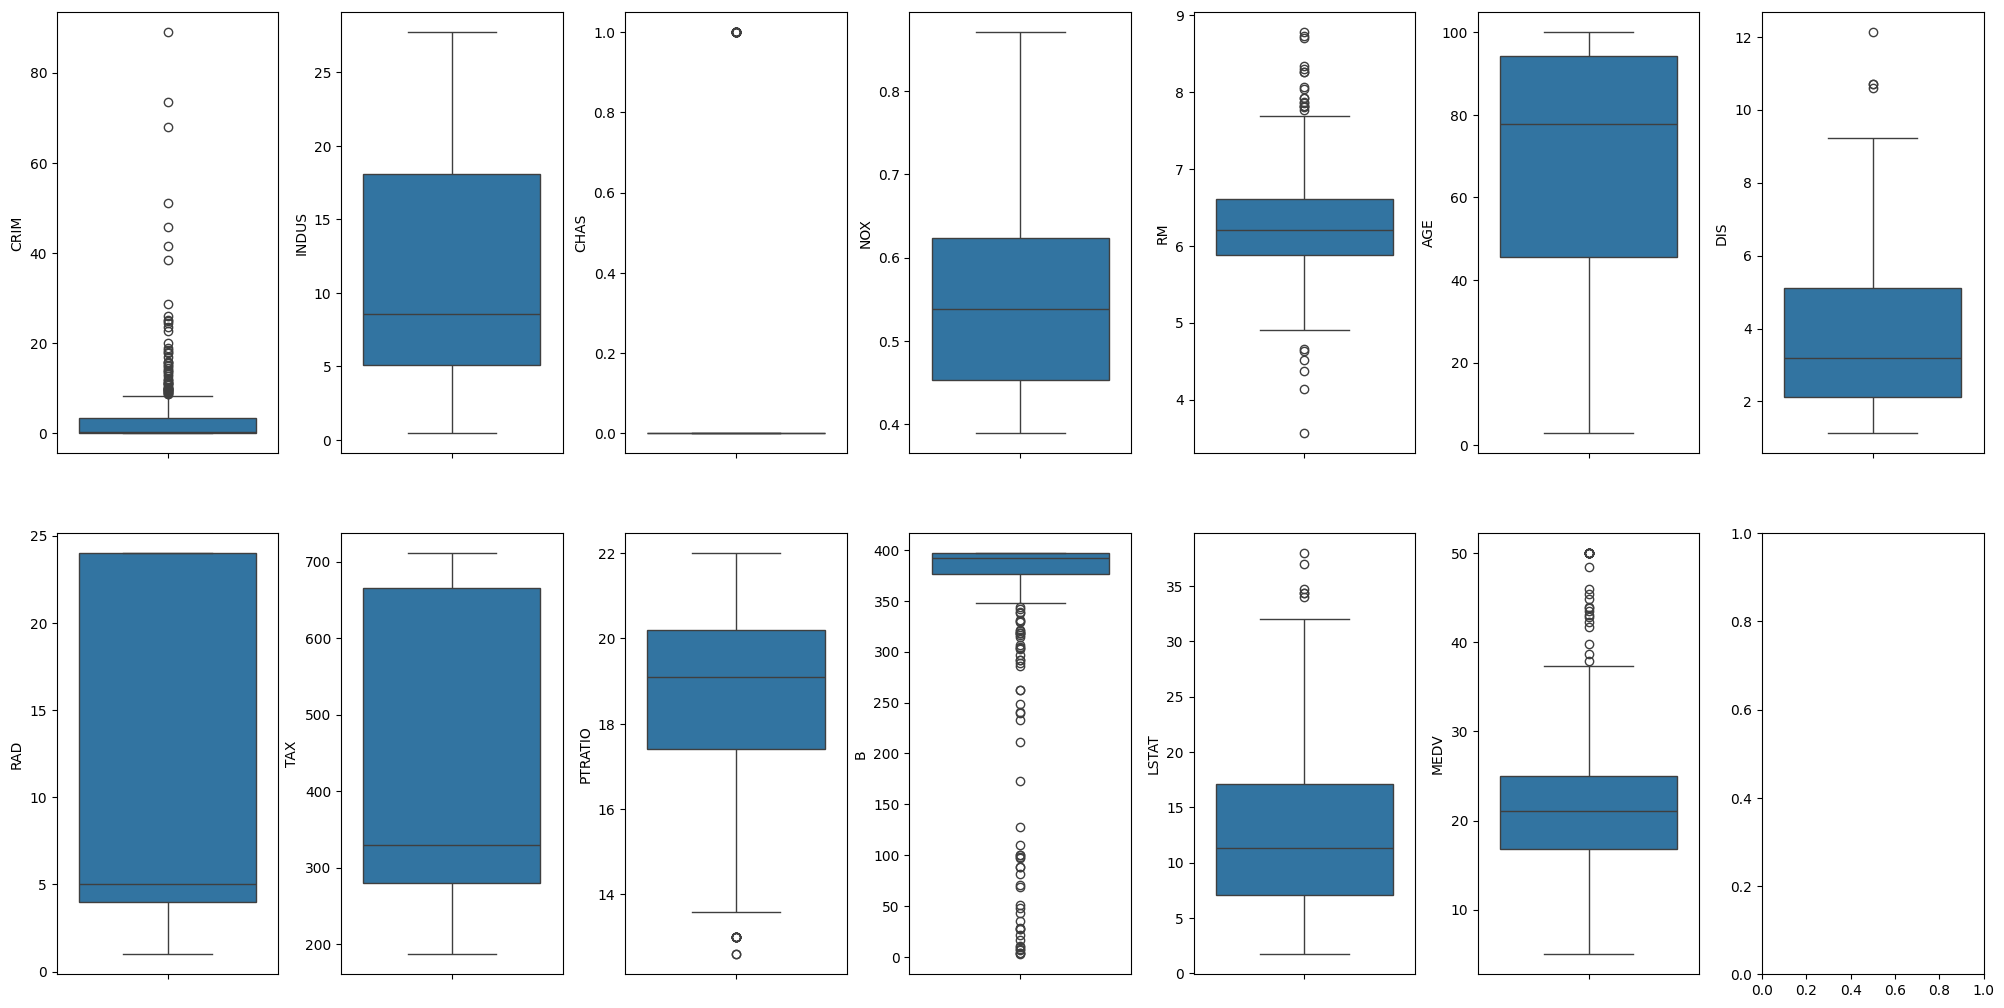

In [11]:
# detect outliers
sub_boxplots(housing_data_cc_no_ZN, 2, 7)

In [12]:
housing_data_cc_no_ZN_no_out = orq_transformation(housing_data_cc_no_ZN)

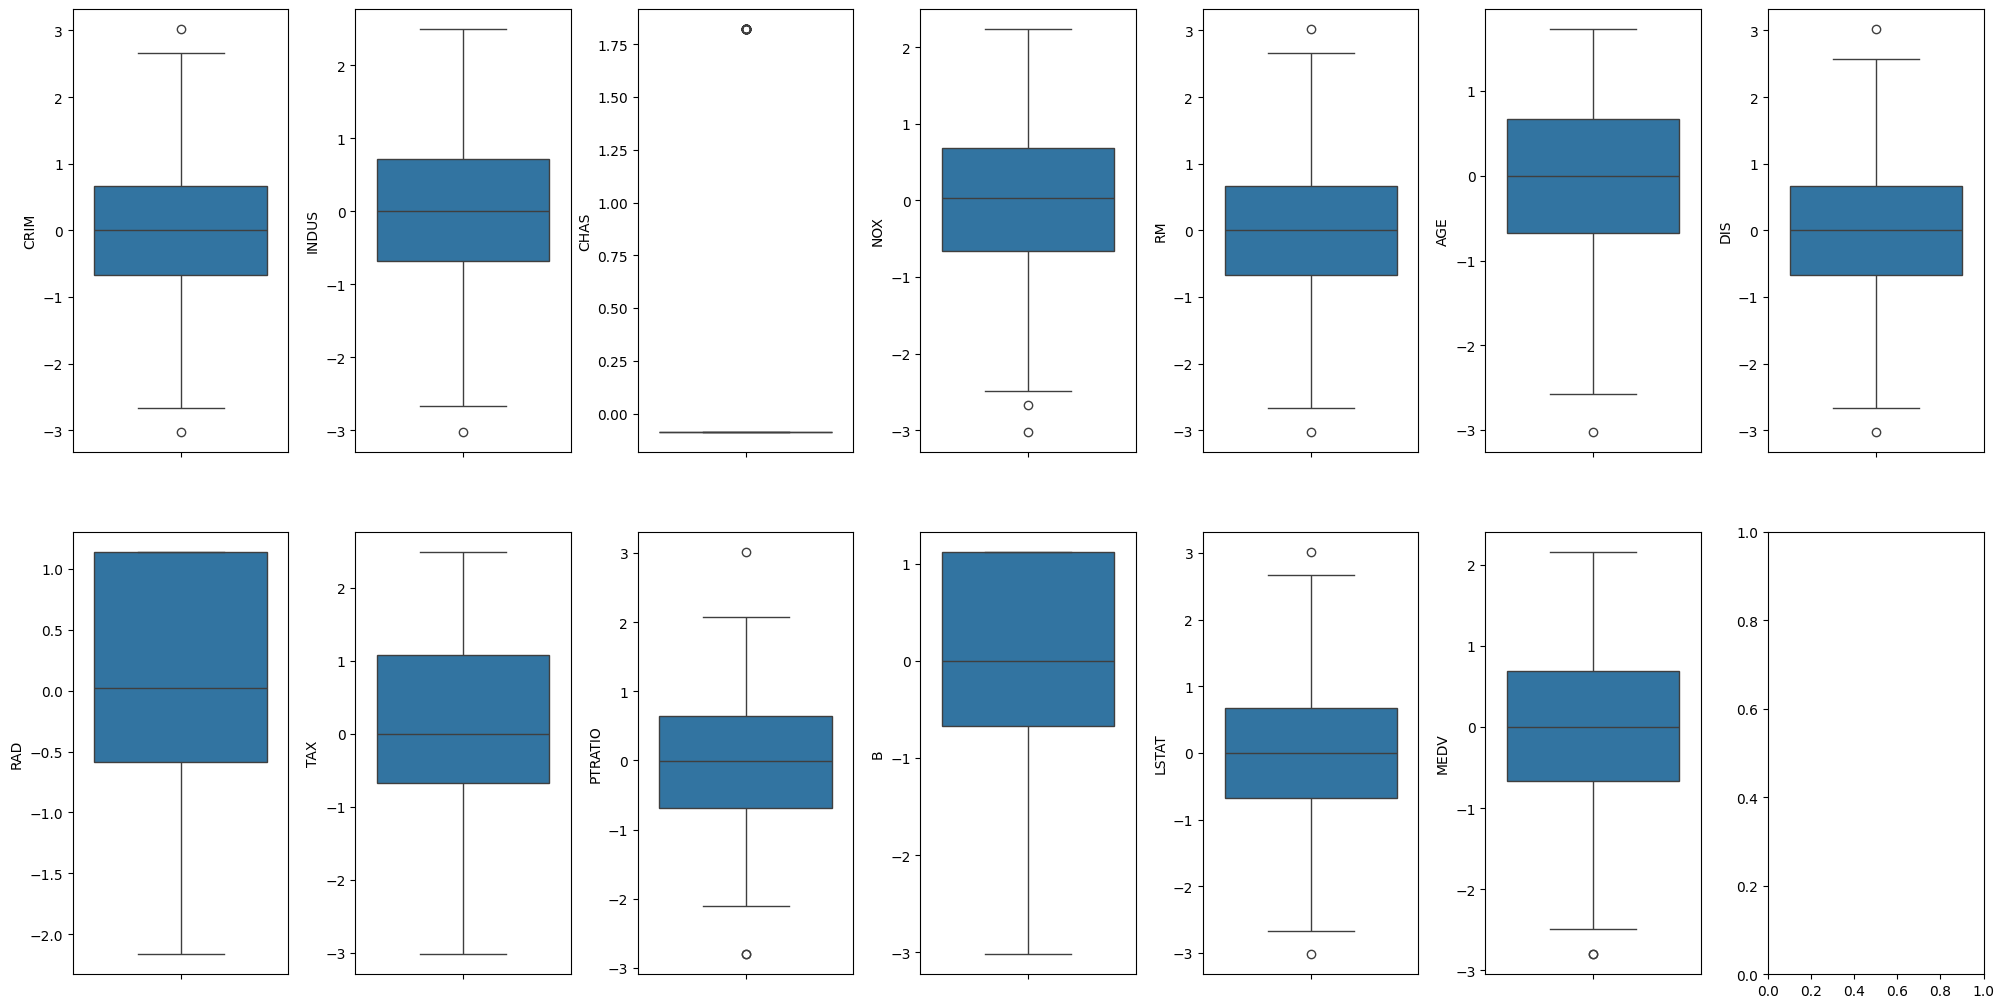

In [13]:
sub_boxplots(housing_data_cc_no_ZN_no_out, 2, 7)

### **Multicollinearity (OLS)**:
- Motivation: Collinear covariates create larger standard errors for coefficient parameter estimation. This also complicates model interpretability since collinear variables' coefficients don't reflect the true impact of the respective covariate to explain the target variable.
- Protocol: Calculate the VIF and remove all collinear covariates
- Application: Remove one covariate at a time until all covariates have a VIF value smaller than 5.
- **RESULTS: Before ORQ transformation, the covariates were highly correlated to one another based on protocol, there were only 5 covariate left: `CRIM`, `INDUS`, `CHAS`, `DIS` and `RAD`. But because of ORQ transformation, all covariates satisfied the threshold of VIF value less than 5**

In [14]:
X_df = housing_data_cc_no_ZN_no_out[features]
vif_df = calc_vif(X_df)

,feature,VIF
0,CRIM,4.793007
3,NOX,4.556412
6,DIS,4.165327
11,LSTAT,3.524716
5,AGE,3.138377
1,INDUS,2.987972
7,RAD,2.793298
8,TAX,2.337856
4,RM,2.178653
9,PTRATIO,1.419424


In [15]:
X_df_pre_ORQ = housing_data_cc_no_ZN[features]
del_multico(X_df_pre_ORQ, vif_df, 5, by='thres')

,feature,VIF
3,NOX,78.038067
4,RM,76.364340
9,PTRATIO,74.067256
8,TAX,54.972552
5,AGE,21.984482
10,B,21.034547
1,INDUS,14.105892
7,RAD,13.764788
6,DIS,11.848193
11,LSTAT,11.250961


,feature,VIF
8,PTRATIO,73.990495
3,RM,56.284274
7,TAX,54.416500
9,B,20.746562
4,AGE,20.356884
6,RAD,13.704166
1,INDUS,12.896245
5,DIS,11.622611
10,LSTAT,10.347754
0,CRIM,1.994629


,feature,VIF
7,TAX,54.067796
3,RM,42.654191
4,AGE,20.177923
8,B,18.967285
6,RAD,13.617468
1,INDUS,12.405792
5,DIS,10.576788
9,LSTAT,9.154924
0,CRIM,1.993616
2,CHAS,1.131719


,feature,VIF
3,RM,39.678947
4,AGE,20.173154
7,B,18.876184
5,DIS,10.264923
8,LSTAT,8.884155
1,INDUS,8.713238
6,RAD,4.832416
0,CRIM,1.993592
2,CHAS,1.110391


,feature,VIF
6,B,14.043276
3,AGE,13.903331
1,INDUS,8.575807
7,LSTAT,8.136531
4,DIS,6.132430
5,RAD,4.647333
0,CRIM,1.987528
2,CHAS,1.107039


,feature,VIF
3,AGE,10.142136
1,INDUS,8.294199
6,LSTAT,8.049382
5,RAD,4.585528
4,DIS,2.069632
0,CRIM,1.964529
2,CHAS,1.095781


,feature,VIF
5,LSTAT,6.403152
1,INDUS,6.260087
4,RAD,4.576350
0,CRIM,1.957854
3,DIS,1.848569
2,CHAS,1.078122


,feature,VIF
4,RAD,4.492423
1,INDUS,3.779114
0,CRIM,1.880824
3,DIS,1.546264
2,CHAS,1.076972


,CRIM,INDUS,CHAS,DIS,RAD
0,0.00632,2.31,0.0,4.0900,1
1,0.02731,7.07,0.0,4.9671,2
2,0.02729,7.07,0.0,4.9671,2
3,0.03237,2.18,0.0,6.0622,3
5,0.02985,2.18,0.0,6.0622,3
...,...,...,...,...,...
499,0.17783,9.69,0.0,2.3999,6
500,0.22438,9.69,0.0,2.4982,6
502,0.04527,11.93,0.0,2.2875,1
503,0.06076,11.93,0.0,2.1675,1


## **Normalization**:
- Motivation: Normalized features improves gradient-based optimization by allowing faster convergence.
- Protocol: Data transformation to normalize the data (log, box-cox, etc).
- Application: Originally I had implemented **Z-score normalization** (shown below) which had the intended effect of centering the data around 0 so the mean = 0 and scaling the variance and standard deviation to 1. But if you look at the KDE plots and shape metrics, the data remained non-normal. The ORQ transformation used to remove the outliers had better success in normalizing the data so that will be the method used in this case. `CHAS` still remains leptokurtic and highly right-skewed in both transformation attempts.

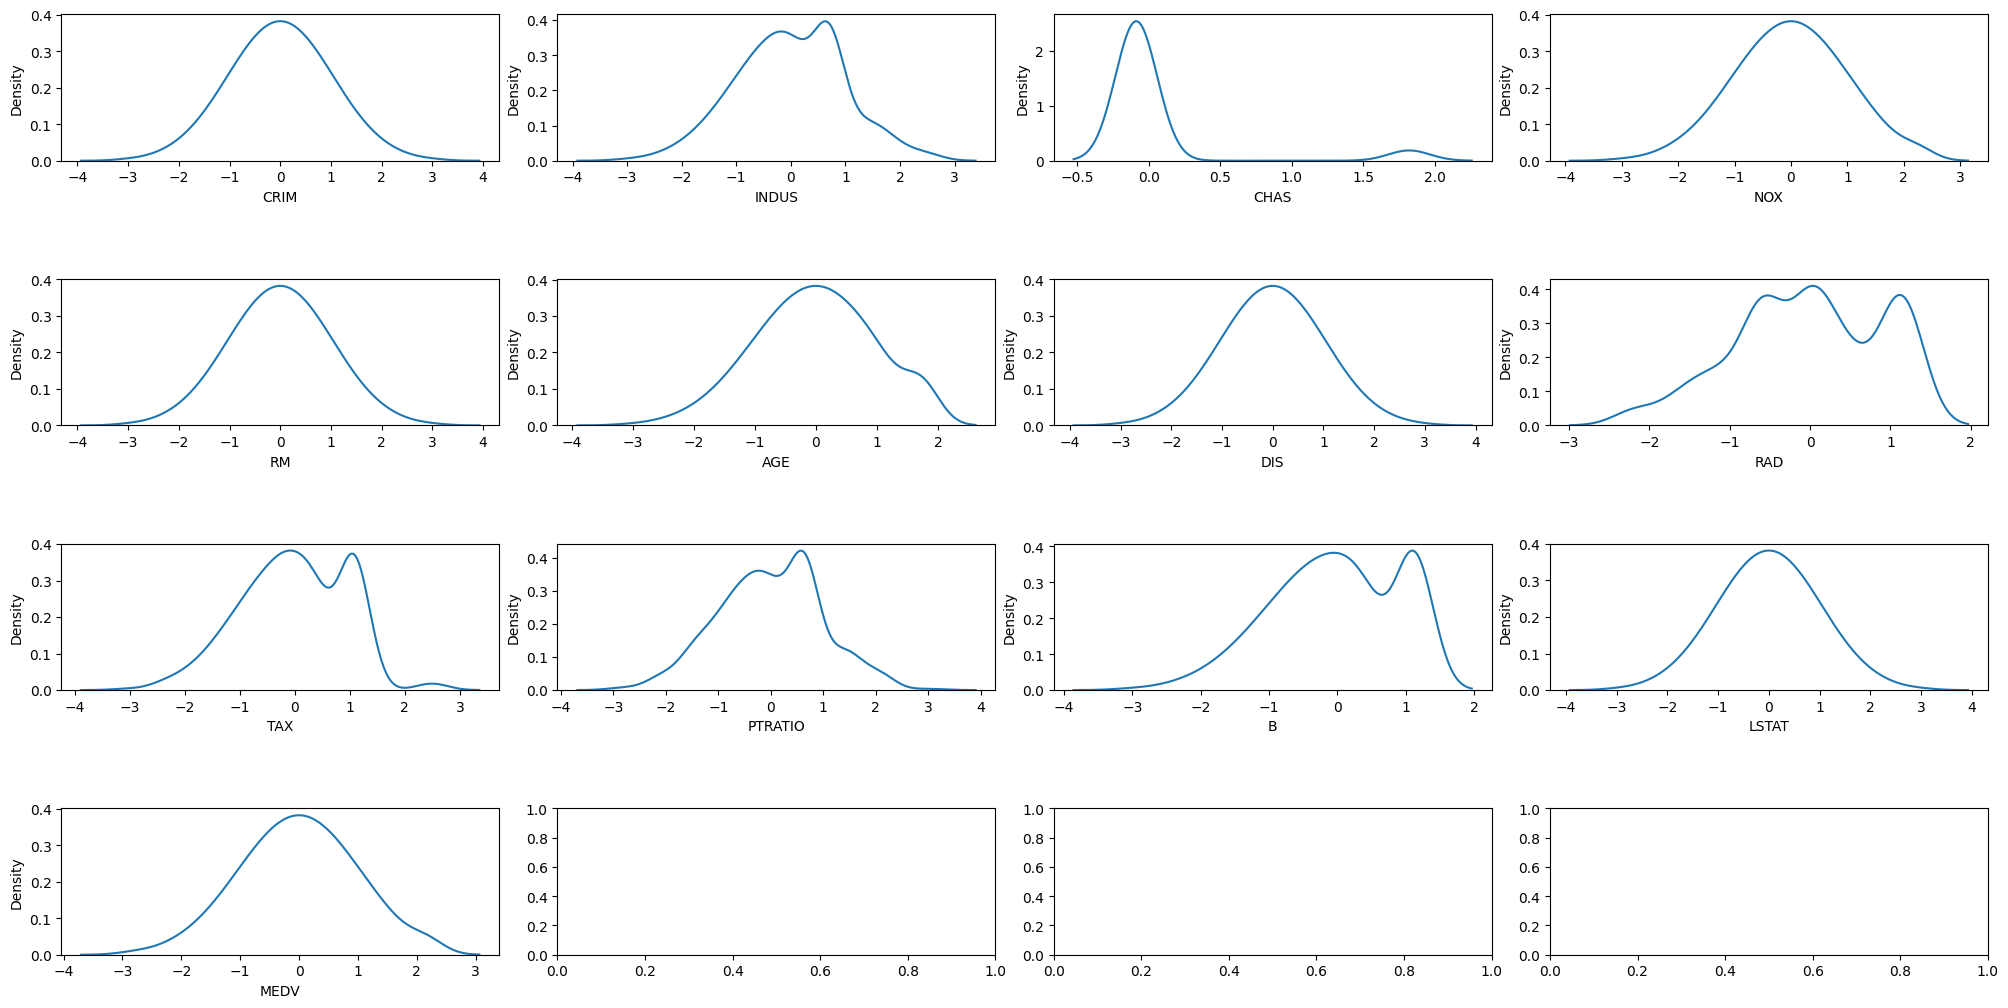

In [16]:
sub_kde_plots(housing_data_cc_no_ZN_no_out, 4, 4)

In [17]:
dist_shape(housing_data_cc_no_ZN_no_out).T

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
skewness,0.000033,-0.060852,3.428643,-0.048468,8.199663e-07,-0.143580,-0.001267,-0.320753,-0.221636,-0.040726,-0.408937,0.000004,-0.050254
kurtosis,-0.043995,-0.045589,9.805344,-0.172037,-4.395845e-02,-0.335416,-0.047492,-0.646825,-0.210026,-0.101677,-0.492606,-0.044115,-0.208475


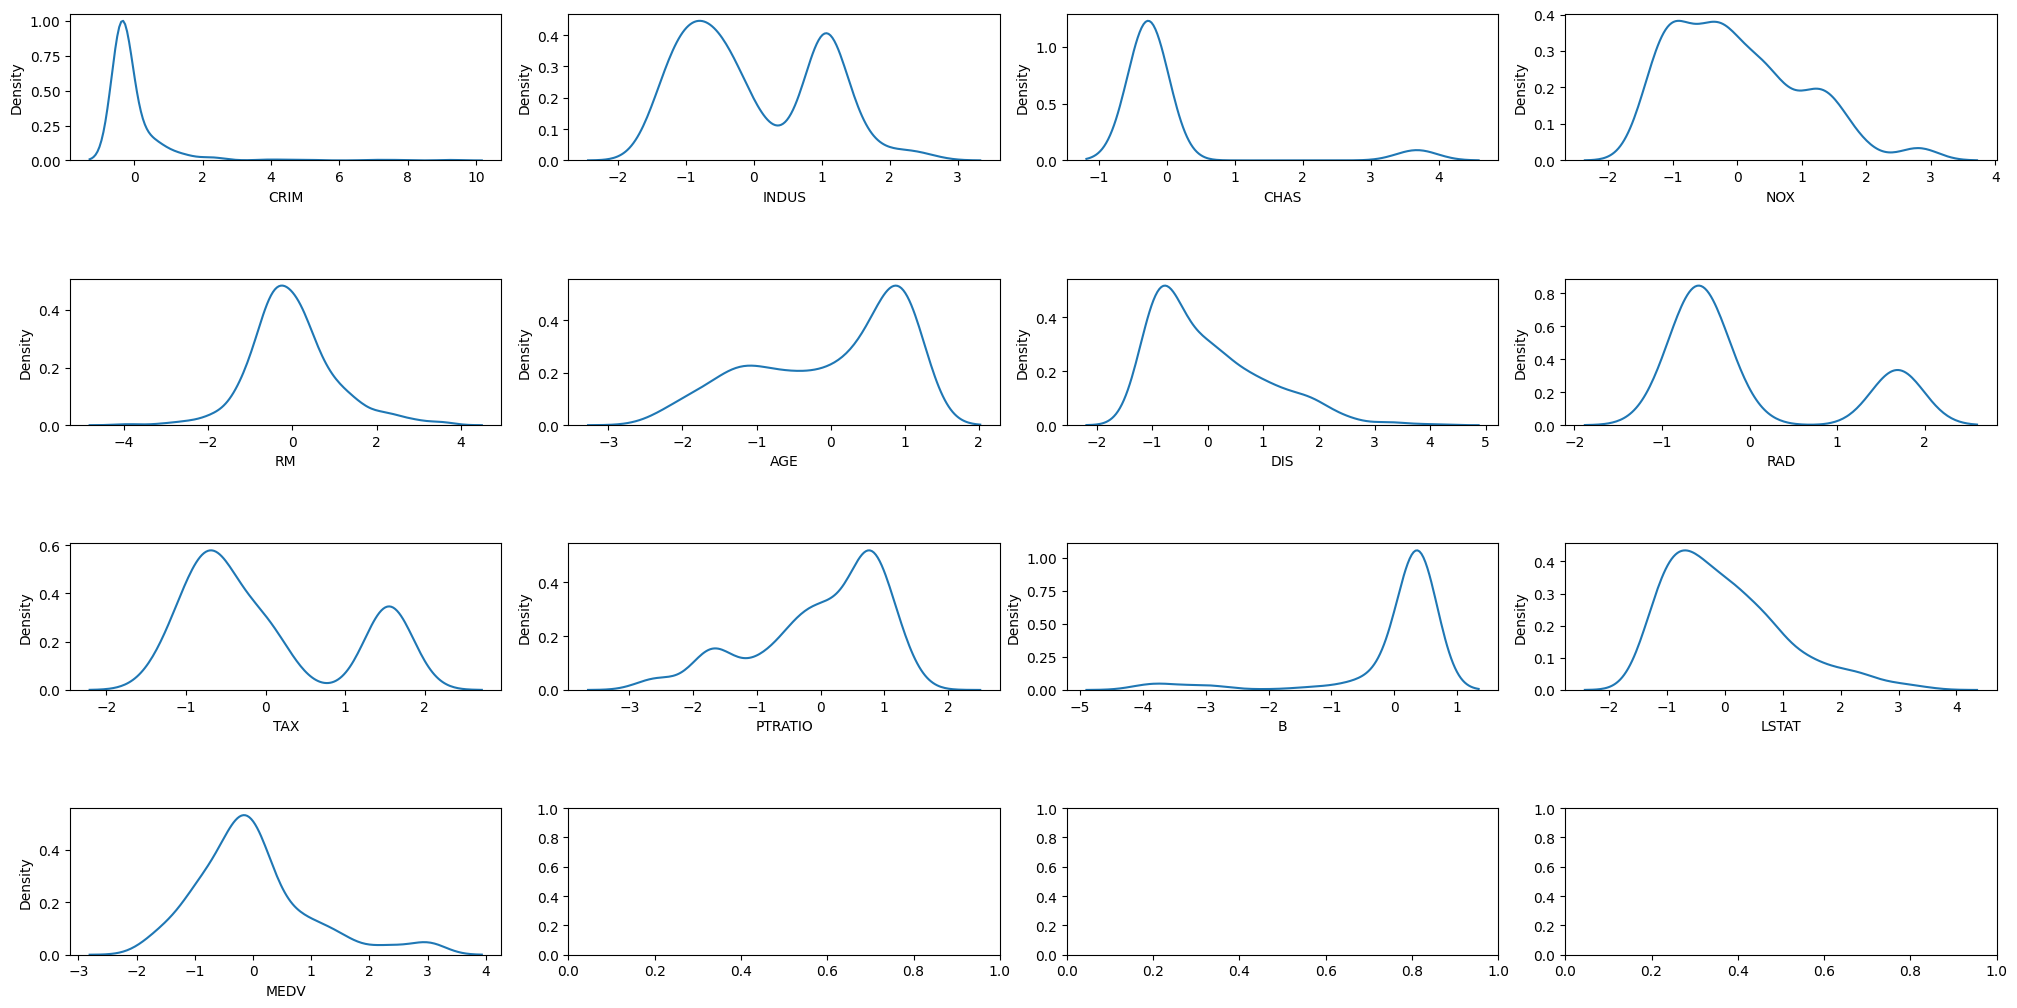

In [18]:
standard_housing_data = (housing_data_cc_no_ZN - housing_data_cc_no_ZN.mean()) / housing_data_cc_no_ZN.std()
sub_kde_plots(standard_housing_data, 4, 4)

In [19]:
dist_shape(standard_housing_data).T

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
skewness,5.256934,0.358792,3.428643,0.703377,0.487558,-0.59488,1.032625,1.050144,0.692876,-0.884475,-2.987695,0.942665,1.065946
kurtosis,35.690207,-1.167539,9.805344,-0.086430,1.832601,-0.96497,0.583327,-0.777460,-1.106102,-0.139934,7.862823,0.541504,1.470867


# Prepare Data for Testing

1. Separate covariates and target variable after data cleaning
2. Create train and test splits with identical distributions.

Even though we don't need a non-parametric test since all our data distributions should be normal after ORQ transformation, we will be using the Kolmogorov-Smirnov test to compare that the cumulative distribution functions of the train sample and test sample come from the same underlying distribution.

In [20]:
# include an additional covariate for the y-intercept (bias)
housing_data_cc_no_ZN_no_out['β_0'] = 1
features = features + ['β_0']

# extract X and y
cleaned_data = housing_data_cc_no_ZN_no_out
X = np.array(cleaned_data.drop(['MEDV'], axis=1))
y = np.array(cleaned_data['MEDV'])

In [21]:
# create train and test datasets for comparison
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# test for identical distrbutions feature by feature using Kolmogorov-Smirnov test
ks_results = {f'{features[i]}': stats.kstest(X_train[:, i], X_test[:, i]) for i in range(X.shape[1])}
ks_df = pd.DataFrame(ks_results, index=["test statistic", "p-value"]).T
ks_df.sort_values(by='p-value')

,test statistic,p-value
DIS,0.129841,0.147810
LSTAT,0.119808,0.215957
AGE,0.117514,0.233472
CRIM,0.117172,0.236232
INDUS,0.113200,0.272226
NOX,0.112823,0.276620
RM,0.108954,0.315441
RAD,0.100360,0.408986
PTRATIO,0.097449,0.445738
B,0.093854,0.492499


## **RESULTS**: 
Our train and test splits are identical distribution so we may proceed with the analysis (pval > 0.05 so there is no statistically significant difference)

# Implement Ordinary Least Squares Regression:
1. Derive the OLS normal equation
2. Implement the fit and predict functions.
3. Train the model on the training set.
4. Evaluate the model on the test set.

# Implement Ridge and Lasso Regression:
1. Implement the fit and predict functions.
2. Train the model on the training set with different values (0.5, 1, 1.5, 2) of the regularization parameter (λ).
3. Evaluate the model on the test set.

In [22]:
# compare models across different input values & libraries
regression_comparison = Regression(feature_names=features)
ridge_λ_values = [0.5, 1, 1.5, 2]
lasso_λ_values = [0.05, 0.1, 0.5, 1]
comparison_results, coef_results = regression_comparison.compare_models(X_train, y_train, X_test, y_test, ridge_λ_values, lasso_λ_values)

In [23]:
comparison_results

,Model,Lambda,MSE (Self),MSE (API),R² (Self),R² (API),MSE Diff,R² Diff
0,OLS,NaN,0.241990,0.241990,0.732909,0.732909,-7.494005e-16,8.881784e-16
1,Ridge,0.50,0.242372,0.242380,0.732487,0.732479,-7.974064e-06,8.801187e-06
2,Ridge,1.00,0.242757,0.242773,0.732062,0.732045,-1.588484e-05,1.753252e-05
3,Ridge,1.50,0.243145,0.243169,0.731634,0.731608,-2.373595e-05,2.619800e-05
4,Ridge,2.00,0.243536,0.243568,0.731203,0.731168,-3.153080e-05,3.480139e-05
5,Lasso,0.05,0.278381,0.282515,0.692744,0.688180,-4.134697e-03,4.563575e-03
6,Lasso,0.10,0.281652,0.285979,0.689133,0.684357,-4.327171e-03,4.776015e-03
7,Lasso,0.50,0.508594,0.527672,0.438651,0.417595,-1.907801e-02,2.105691e-02
8,Lasso,1.00,0.937404,0.963608,-0.034637,-0.063560,-2.620426e-02,2.892234e-02


In [24]:
coef_results.pivot_table(index='features', columns=['Model', 'Lambda'], values='stderror')

Model        Lasso                                     OLS     Ridge  \
Lambda        0.05       0.1       0.5         1      None       0.5   
features                                                               
AGE       0.125777  0.126514  0.170007  0.230805  0.117268  0.117361   
B         0.075550  0.075993  0.102118  0.138638  0.070440  0.070495   
CHAS      0.130745  0.131511  0.176722  0.239920  0.121900  0.121996   
CRIM      0.136429  0.137228  0.184405  0.250351  0.127199  0.127300   
DIS       0.110402  0.111049  0.149226  0.202592  0.102934  0.103015   
INDUS     0.092492  0.093033  0.125017  0.169725  0.086235  0.086303   
LSTAT     0.113476  0.114141  0.153380  0.208232  0.105799  0.105883   
NOX       0.126781  0.127524  0.171364  0.232647  0.118204  0.118298   
PTRATIO   0.071376  0.071794  0.096475  0.130977  0.066547  0.066600   
RAD       0.106703  0.107328  0.144226  0.195804  0.099485  0.099563   
RM        0.097460  0.098031  0.131732  0.178842  0.090867  0.090938   
TAX       0.091694  0.092231  0.123938  0.168261  0.085491  0.085558   
β_0       0.059291  0.059638  0.080141  0.108800  0.055280  0.055323   

Model                                   
Lambda           1       1.5         2  
features                                
AGE       0.117454  0.117548  0.117642  
B         0.070551  0.070607  0.070664  
CHAS      0.122093  0.122190  0.122289  
CRIM      0.127401  0.127503  0.127605  
DIS       0.103097  0.103179  0.103262  
INDUS     0.086371  0.086440  0.086510  
LSTAT     0.105967  0.106051  0.106137  
NOX       0.118392  0.118486  0.118581  
PTRATIO   0.066653  0.066706  0.066759  
RAD       0.099642  0.099722  0.099802  
RM        0.091011  0.091083  0.091156  
TAX       0.085626  0.085694  0.085763  
β_0       0.055367  0.055411  0.055456

In [25]:
coef_results.pivot_table(index='features', columns=['Model', 'Lambda'], values='coefficients')

Model        Lasso                                OLS     Ridge            \
Lambda        0.05       0.1       0.5    1      None       0.5         1   
features                                                                    
AGE       0.000000  0.000000  0.000000  0.0 -0.057915 -0.058473 -0.059014   
B         0.000000  0.000000  0.000000  0.0  0.011326  0.011715  0.012093   
CHAS      0.000000  0.000000  0.000000  0.0  0.138878  0.138030  0.137196   
CRIM     -0.039007 -0.022149  0.000000  0.0 -0.123343 -0.122452 -0.121592   
DIS       0.000000  0.000000  0.000000  0.0 -0.200269 -0.198013 -0.195807   
INDUS     0.000000  0.000000  0.000000  0.0 -0.017532 -0.017901 -0.018262   
LSTAT    -0.598880 -0.603942 -0.353344  0.0 -0.565502 -0.562900 -0.560335   
NOX       0.000000  0.000000  0.000000  0.0 -0.094231 -0.092722 -0.091261   
PTRATIO  -0.134153 -0.106002  0.000000  0.0 -0.154041 -0.154383 -0.154713   
RAD       0.000000  0.000000  0.000000  0.0  0.074062  0.072482  0.070945   
RM        0.087400  0.056538  0.000000  0.0  0.110614  0.111889  0.113136   
TAX      -0.126094 -0.103784  0.000000  0.0 -0.190002 -0.189226 -0.188467   
β_0       0.000000  0.000000  0.000000  0.0 -0.032724 -0.032637 -0.032551   

Model                         
Lambda         1.5         2  
features                      
AGE      -0.059541 -0.060054  
B         0.012460  0.012816  
CHAS      0.136376  0.135568  
CRIM     -0.120760 -0.119955  
DIS      -0.193649 -0.191539  
INDUS    -0.018614 -0.018958  
LSTAT    -0.557807 -0.555314  
NOX      -0.089846 -0.088475  
PTRATIO  -0.155034 -0.155343  
RAD       0.069448  0.067991  
RM        0.114357  0.115553  
TAX      -0.187724 -0.186996  
β_0      -0.032467 -0.032384

# Comparison and Analysis:
1. Compare your solutions with standard APIs in terms of model parameters and appropriate metrics (e.g., Mean Squared Error, R^2 score).
2. Analyze the effect of the normalization, transformation and regularization parameter for Ridge and Lasso Regression.
3. Provide reasoning for difference in solution.

